In [1]:
from skimage import io, img_as_ubyte, filters
from skimage.color import rgb2gray
from scipy import ndimage as ndi
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.spatial import distance
import cv2
import math
import numpy as np
import random

In [2]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [3]:
#Segmentacja i scalanie obiektów 
def segmentuj(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):
            if img[i][j] != 255.0:
                if img[i][j] == 0.0:
                    img[i][j] = random.randint(1, 250)
                    if img[i-1][j-1] != 0.0 and img[i-1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i-1][j] != 0.0 and img[i-1][j] != 255.0:
                        img[i][j] = img[i-1][j]
                    elif img[i-1][j+1] != 0.0 and img[i-1][j+1] != 255.0:
                        img[i][j] = img[i-1][j+1]
                    elif img[i][j-1] != 0.0 and img[i][j-1] != 255.0:
                        img[i][j] = img[i][j-1]
                    elif img[i][j+1] != 0.0 and img[i][j+1] != 255.0:
                        img[i][j] = img[i][j+1]
                    elif img[i+1][j-1] != 0.0 and img[i+1][j-1] != 255.0:
                        img[i][j] = img[i-1][j-1]
                    elif img[i+1][j] != 0.0 and img[i+1][j] != 255.0:
                        img[i][j] = img[i+1][j]
                    elif img[i+1][j+1] != 0.0 and img[i+1][j+1] != 255.0:
                        img[i][j] = img[i+1][j+1]
                    else:
                        continue
                    #scalanie obiektów
                if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255.0:
                    img[i][j] = img[i-1][j-1]
                    
                elif img[i][j] != img[i-1][j] and img[i-1][j] != 255.0:
                    img[i][j] = img[i-1][j]
                    
                elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255.0:
                    img[i-1][j+1] = img[i][j]
                    
                elif img[i][j] != img[i][j-1] and img[i][j-1] != 255.0:
                    img[i][j-1] = img[i][j]
                    
                elif img[i][j] != img[i][j+1] and img[i][j+1] != 255.0:
                    img[i][j+1] = img[i][j]
                    
                elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255.0:
                    img[i][j] = img[i+1][j-1]
                    
                elif img[i][j] != img[i+1][j] and img[i+1][j] != 255.0:
                    img[i][j] = img[i+1][j]
                elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255.0:
                    img[i][j] = img[i+1][j+1]
                else:
                    continue
    return img


def scal(img):
    for i in range(img.shape[0]-4):
        for j in range(img.shape[1]-4):   
            if img[i][j] != img[i-1][j-1] and img[i-1][j-1] != 255:
                img[i][j] = img[i-1][j-1]

            elif img[i][j] != img[i-1][j] and img[i-1][j] != 255:
                img[i][j] = img[i-1][j]

            elif img[i][j] != img[i-1][j+1] and img[i-1][j+1] != 255:
                img[i-1][j+1] = img[i][j]

            elif img[i][j] != img[i][j-1] and img[i][j-1] != 255:
                img[i][j-1] = img[i][j]

            elif img[i][j] != img[i][j+1] and img[i][j+1] != 255:
                img[i][j+1] = img[i][j]

            elif img[i][j] != img[i+1][j-1] and img[i+1][j-1] != 255:
                img[i][j] = img[i+1][j-1]

            elif img[i][j] != img[i+1][j] and img[i+1][j] != 255:
                img[i][j] = img[i+1][j]
            elif img[i][j] != img[i+1][j+1] and img[i+1][j+1] != 255:
                img[i][j] = img[i+1][j+1]
            else:
                continue
                
    return img

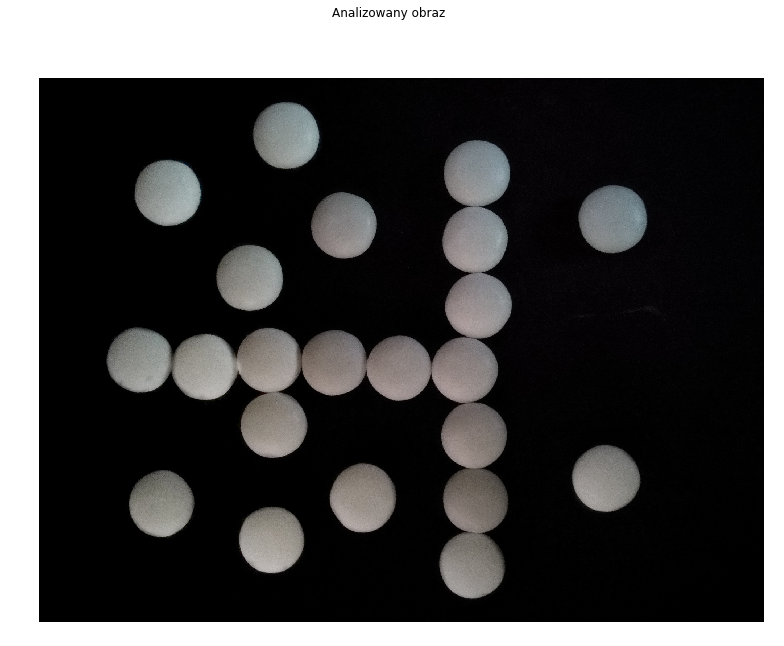

In [109]:
img = io.imread('mentosy/img15.jpg')

plt.figure(figsize=(15,10))
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.suptitle('Analizowany obraz')
plt.show()

In [110]:
#obliczanie ile procent danego obrazu zajmują obiekty
def ile_procent(img):
    obiekt = 0
    tlo = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] == 255:
                obiekt += 1
            elif img[i][j] == 0:
                tlo += 1
    return (obiekt/tlo)*100

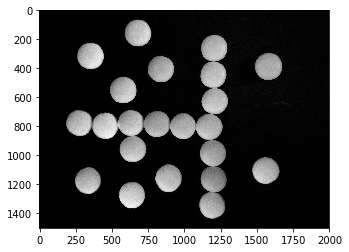

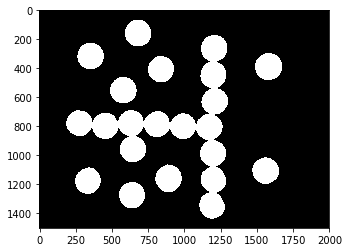

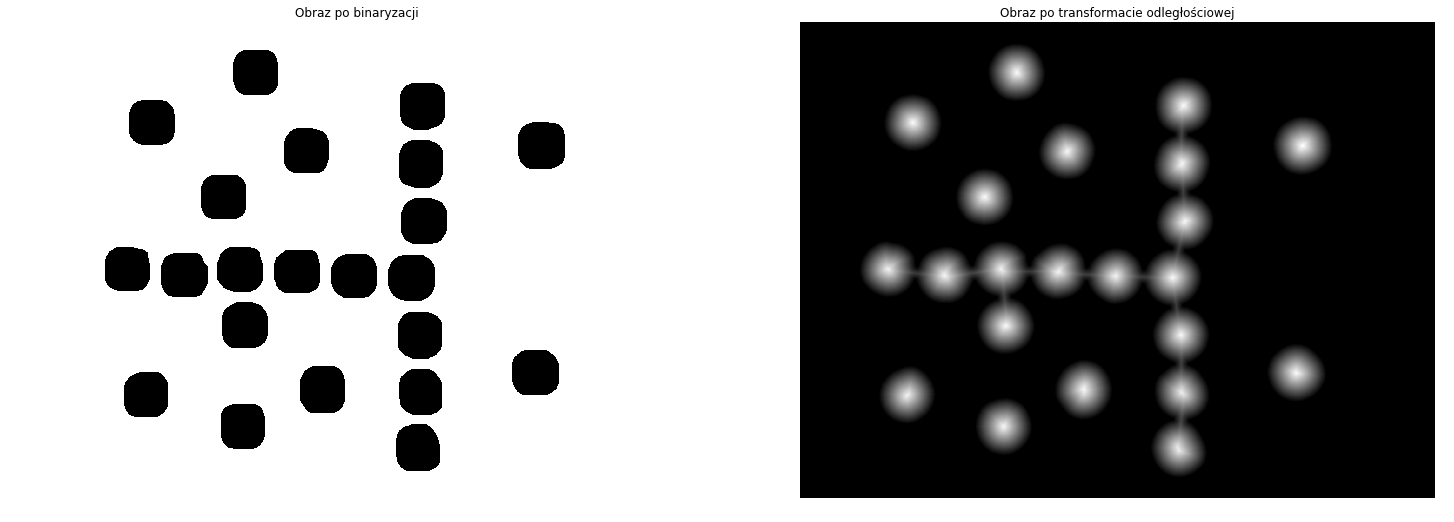

In [111]:
image = img_as_ubyte(rgb2gray(img))#najpierw zmiana na obraz w odcieniach szarości, następnie na wartości 0-255
th = 150 
kernel = np.ones((3,3),np.uint8)
plt.imshow(image, cmap="gray")
plt.axis('on')
plt.show()

th, bimm = cv2.threshold(image, thresh=th, maxval=255, type=cv2.THRESH_OTSU)#binaryzacja obrazu wejściowego metodą OTSU  
mbim = cv2.medianBlur(bimm,  11)#filtr medianowy

plt.imshow(mbim, cmap="gray")
plt.axis('on')
plt.show()

#ile = ile_procent(mbim)
#print('Obiekty na tym obrazie zajmują: %.2f' % ile, "%")

dt = cv2.distanceTransform(mbim, distanceType=cv2.DIST_L2, maskSize=cv2.DIST_MASK_PRECISE)#transformata odległościowa

th = 45
th, bim = cv2.threshold(dt, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)#ponowna binaryzacja aby obiekty miały wartość 255
bimm = cv2.erode(bim, kernel=kernel, iterations=25)#operacja erozji
show2imgs(bimm, dt, title1='Obraz po binaryzacji', title2='Obraz po transformacie odległościowej', size=(25,25))

In [112]:
#Liczenie ilości obiektów na obrazie
def licz_obiekty(img):
    ile_obiektow = 0
    obiekty = []
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i][j] != 255:
                obiekty.append(img[i][j])
    ile_obiektow = len(list(set(obiekty)))# zlicza niepowtarzające się elementy listy
    return ile_obiektow

56
0
Wykonało się!
56
Wykonało się!
26
Wykonało się!


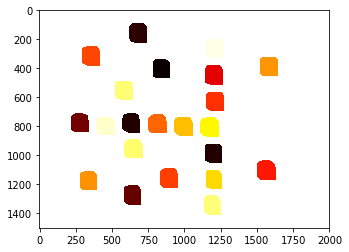

Obiektów jest:	 21


In [113]:
nimg = segmentuj(bimm)
tmp = 0
ile = licz_obiekty(nimg)
print(ile)
while tmp != ile:
    print(tmp)
    #nimg = scal(nimg)
    nimg = scal(nimg)
    nimg = scal(nimg)
    tmp = ile
    ile = licz_obiekty(nimg)
    print("Wykonało się!")

plt.imshow(nimg, cmap="hot")
plt.axis('on')
plt.show()
    
print("Obiektów jest:\t", ile)

Prog binaryzacji:  45.0


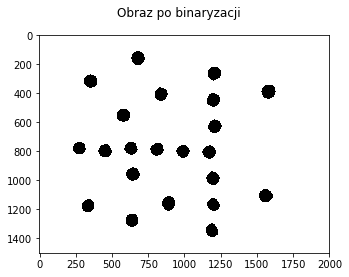

In [114]:
print('Prog binaryzacji: ', th)


binary = bim < th

plt.imshow(binary, cmap='binary')
plt.axis('on')
plt.suptitle('Obraz po binaryzacji')
plt.show()

In [115]:
label_objects, nb_labels = ndi.label(binary)

sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0

figures = mask_sizes[label_objects]

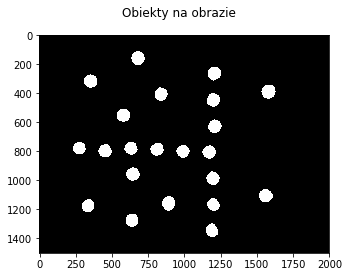

(1500, 2000)
(1500, 2000)
22


In [116]:
plt.imshow(figures, cmap="gray")
plt.axis('on')
plt.suptitle('Obiekty na obrazie')
plt.show()

print(figures.shape)
print(label_objects.shape)
print(nb_labels)

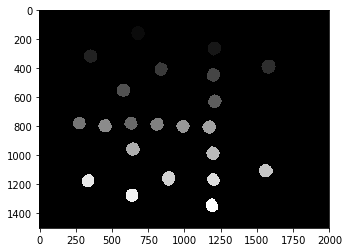

[2856466    6767    6912    6701    7462    6421    6711    6762    6581
    6165    6081    6326    6523    6095    6591    6616    6480    6774
    6941    5857    6129    6455    6184] [False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
3000000 (1500, 2000)
6912


In [117]:
plt.imshow(label_objects,cmap='gray')
plt.show()

mask_sizes
print(sizes, mask_sizes)
#print(label_objects[250][300])
#print(label_objects[100][400])
#print(label_objects[100][100])
print (label_objects.size, label_objects.shape)
print(np.sum(label_objects == 2))

In [118]:
no_of_object = 2

def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects, i+1))

print(cogs)

[(158, 682), (263, 1207), (316, 355), (389, 1583), (406, 841), (446, 1202), (551, 581), (627, 1211), (778, 633), (778, 277), (785, 814), (797, 456), (799, 993), (804, 1173), (956, 647), (985, 1199), (1105, 1563), (1158, 893), (1166, 1202), (1174, 337), (1273, 641), (1344, 1192)]


(158, 682)
(263, 1207)
(316, 355)
(389, 1583)
(406, 841)
(446, 1202)
(551, 581)
(627, 1211)
(778, 633)
(778, 277)
(785, 814)
(797, 456)
(799, 993)
(804, 1173)
(956, 647)
(985, 1199)
(1105, 1563)
(1158, 893)
(1166, 1202)
(1174, 337)
(1273, 641)
(1344, 1192)


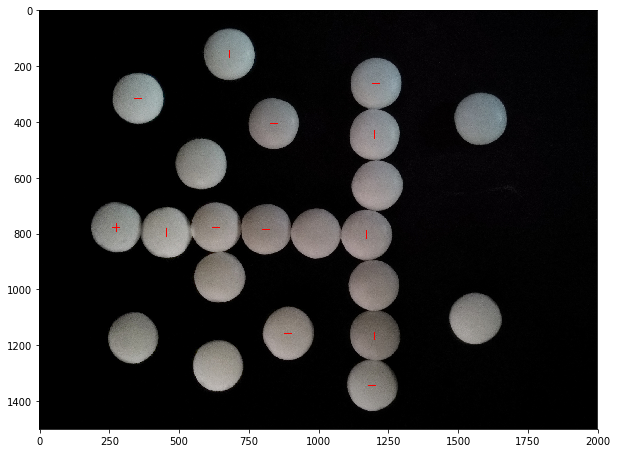

In [119]:
def drawMarkers(image, coords):

    image = np.copy(image)
    
    for item in coords:
        y,x = item
        print(item)
        for j in range(y-15, y+15):
            image[j,x] = (255,0,0)
        for i in range(x-14, x+15):
            image[y,i] = (255,0,0)
            
    return image


lo = drawMarkers(img, cogs)
plt.figure(figsize=(10,10))
plt.imshow(lo,cmap='hot')
plt.show()

In [120]:
cogs2 = sorted(cogs, key=itemgetter(0,1))
print(cogs2)

from numpy.linalg import norm
cogs3 = sorted(cogs, key=lambda tup: norm(tup))
print(cogs3)

for item in cogs3:
    print(norm(item))

[(158, 682), (263, 1207), (316, 355), (389, 1583), (406, 841), (446, 1202), (551, 581), (627, 1211), (778, 277), (778, 633), (785, 814), (797, 456), (799, 993), (804, 1173), (956, 647), (985, 1199), (1105, 1563), (1158, 893), (1166, 1202), (1174, 337), (1273, 641), (1344, 1192)]
[(316, 355), (158, 682), (551, 581), (778, 277), (797, 456), (406, 841), (778, 633), (785, 814), (956, 647), (1174, 337), (263, 1207), (799, 993), (446, 1202), (627, 1211), (804, 1173), (1273, 641), (1158, 893), (985, 1199), (389, 1583), (1166, 1202), (1344, 1192), (1105, 1563)]
475.26939728957933
700.0628543209531
800.7259206495066
825.8407836865409
918.2292742011659
933.8720469100679
1002.9820536779309
1130.8496805499835
1154.3591295606407
1221.4110692146196
1235.3210109117388
1274.539132392568
1282.076440778786
1363.6898474359923
1422.0917691907227
1425.2754119818387
1462.3313577982249
1551.717113394062
1630.0950892509309
1674.622345485692
1796.4409258308497
1914.156210971299


In [121]:
p1 = 0
p2 = 1

print(cogs3[p1], cogs3[p2])
print(label_objects.shape[0])

(316, 355) (158, 682)
1500


In [122]:
y = cogs3[p1][0] - cogs3[p2][0]
x = cogs3[p1][1] - cogs3[p2][1]
print(x,y)

angle = math.degrees(math.atan2(-y, x)) + 180

print(int(angle))

-327 158
25


In [123]:
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)

22


In [124]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))

6767
6912
6701
7462
6421
6711
6762
6581
6165
6081
6326
6523
6095
6591
6616
6480
6774
6941
5857
6129
6455
6184


In [125]:
def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]


for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts))

Liczba punktow:  6767  Srodek ciezkosci:  [158.64430323629378, 682.5024383035318]
Liczba punktow:  6912  Srodek ciezkosci:  [263.21339699074076, 1207.775607638889]
Liczba punktow:  6701  Srodek ciezkosci:  [316.3120429786599, 355.3363677063125]
Liczba punktow:  7462  Srodek ciezkosci:  [389.004020369874, 1583.0347091932458]
Liczba punktow:  6421  Srodek ciezkosci:  [406.8434823236256, 841.4851269272699]
Liczba punktow:  6711  Srodek ciezkosci:  [446.1999701981821, 1202.2306660706304]
Liczba punktow:  6762  Srodek ciezkosci:  [551.2388346643005, 581.5595977521443]
Liczba punktow:  6581  Srodek ciezkosci:  [627.9750797751102, 1211.759307096186]
Liczba punktow:  6165  Srodek ciezkosci:  [778.5433901054339, 633.879805352798]
Liczba punktow:  6081  Srodek ciezkosci:  [778.488735405361, 277.92517678013485]
Liczba punktow:  6326  Srodek ciezkosci:  [785.7581410053747, 814.1221941195068]
Liczba punktow:  6523  Srodek ciezkosci:  [797.3354284838265, 456.10853901579026]
Liczba punktow:  6095  Sr

In [126]:
def computeBB(points):
    
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

In [127]:
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)

In [128]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    
    print('Liczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nBlair-Bliss: ', bb,'\nFeret: ',feret, '\n---\n')

Liczba punktow:  6767 
Srodek ciezkosci:  [158.64430323629378, 682.5024383035318] 
Blair-Bliss:  0.999362348238058 
Feret:  1.010989010989011 
---

Liczba punktow:  6912 
Srodek ciezkosci:  [263.21339699074076, 1207.775607638889] 
Blair-Bliss:  0.9989254629584083 
Feret:  1.0666666666666667 
---

Liczba punktow:  6701 
Srodek ciezkosci:  [316.3120429786599, 355.3363677063125] 
Blair-Bliss:  0.9996885207862417 
Feret:  1.0 
---

Liczba punktow:  7462 
Srodek ciezkosci:  [389.004020369874, 1583.0347091932458] 
Blair-Bliss:  0.9993305718441452 
Feret:  0.9896907216494846 
---

Liczba punktow:  6421 
Srodek ciezkosci:  [406.8434823236256, 841.4851269272699] 
Blair-Bliss:  0.9989946337280684 
Feret:  1.011111111111111 
---

Liczba punktow:  6711 
Srodek ciezkosci:  [446.1999701981821, 1202.2306660706304] 
Blair-Bliss:  0.9976522156490402 
Feret:  1.1235955056179776 
---

Liczba punktow:  6762 
Srodek ciezkosci:  [551.2388346643005, 581.5595977521443] 
Blair-Bliss:  0.9996857013652606 
Feret